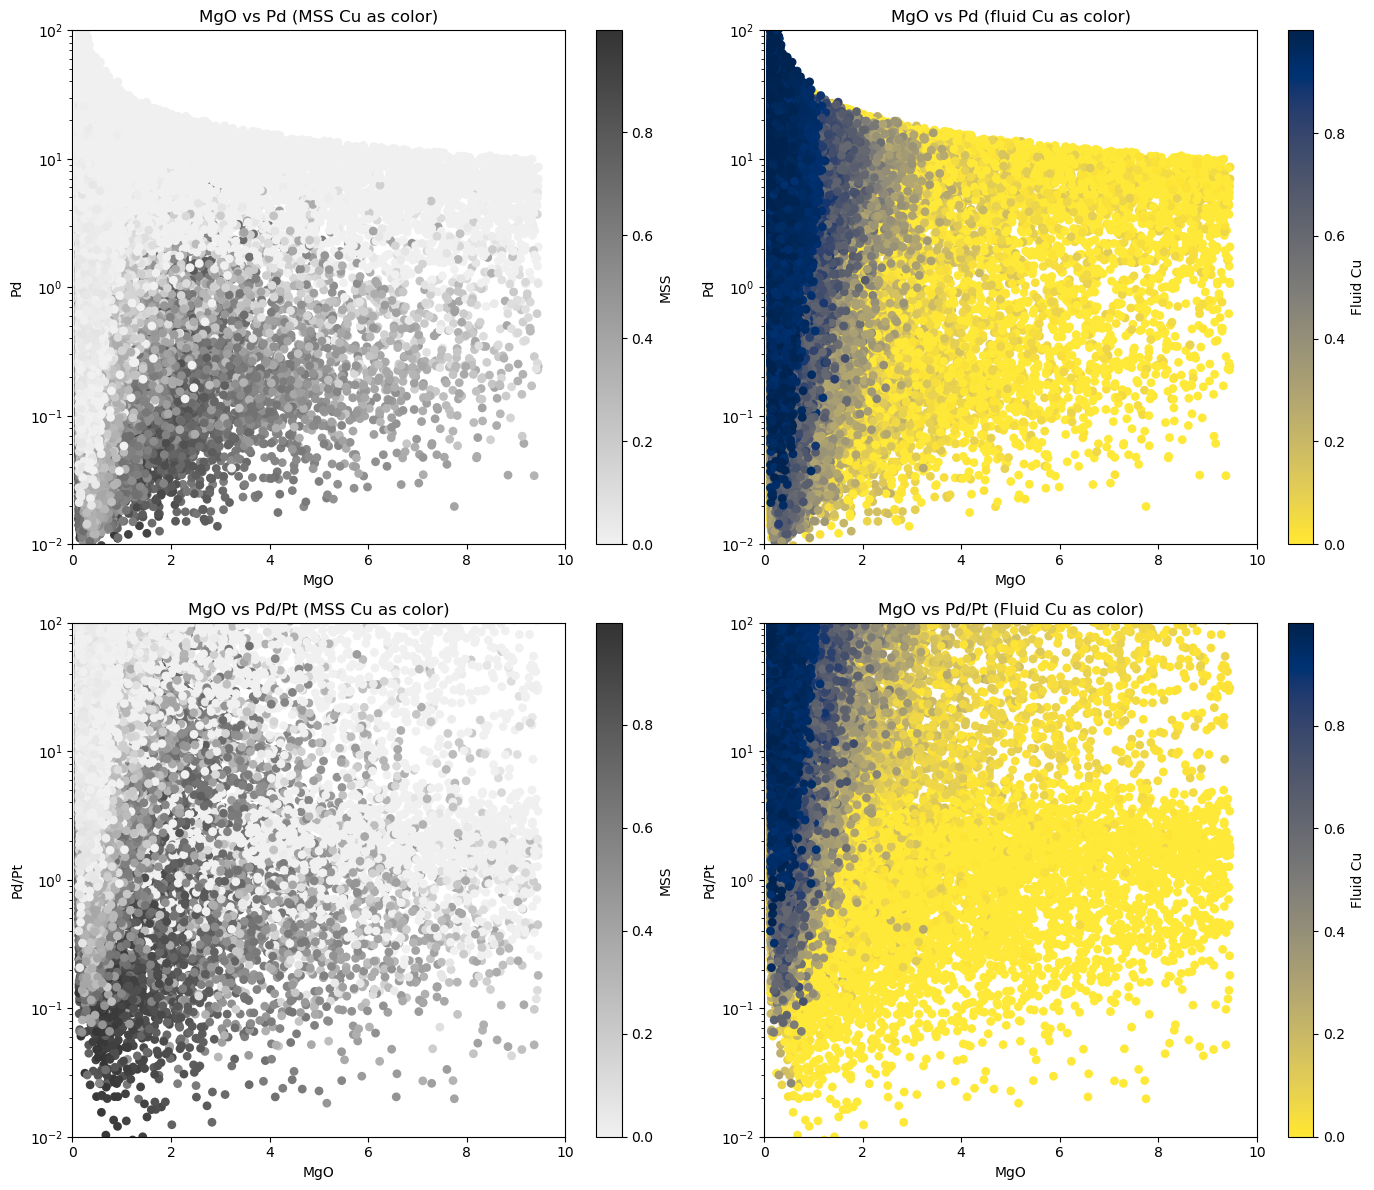

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

PGE_model = pd.read_csv('PGEs model results.csv')

PGE_model_shuf = PGE_model.sample(frac=1, random_state=None).reset_index(drop=True)

cmap_grey = LinearSegmentedColormap.from_list('grey_cmap', ['#f0f0f0', '#333333'])

PGE_model_shuf['FluidCu_bin'] = pd.qcut(PGE_model_shuf['Fluid Cu'], 4, labels=False, duplicates='drop')

dfs = []

for name, group in PGE_model_shuf.groupby('FluidCu_bin', sort=True):
    group_shuffled = group.sample(frac=1, random_state=None)
    dfs.append(group_shuffled)

PGE_model_shuffled = pd.concat(dfs, ignore_index=True)

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

sc1 = axs[0, 0].scatter(PGE_model_shuffled['MgO'], PGE_model_shuffled['Pd'], 
                     c=PGE_model_shuffled['MSS Cu'], cmap=cmap_grey, s=40, marker='o', edgecolors='none', rasterized=True)
axs[0, 0].set_xlabel('MgO')
axs[0, 0].set_ylabel('Pd')
axs[0, 0].set_title('MgO vs Pd (MSS Cu as color)')
axs[0, 0].set_yscale('log')
axs[0, 0].set_ylim([0.01, 100])
axs[0, 0].set_xlim([0, 10])

cbar1 = fig.colorbar(sc1, ax=axs[0, 0])
cbar1.set_label('MSS')

sc2 = axs[0, 1].scatter(PGE_model_shuffled['MgO'], PGE_model_shuffled['Pd'], 
                     c=PGE_model_shuffled['Fluid Cu'], cmap='cividis_r', s=40, marker='o', edgecolors='none', rasterized=True)
axs[0, 1].set_xlabel('MgO')
axs[0, 1].set_ylabel('Pd')
axs[0, 1].set_title('MgO vs Pd (fluid Cu as color)')
axs[0, 1].set_yscale('log')
axs[0, 1].set_ylim([0.01, 100])
axs[0, 1].set_xlim([0, 10])

cbar2 = fig.colorbar(sc2, ax=axs[0, 1])
cbar2.set_label('Fluid Cu')

sc3 = axs[1, 0].scatter(PGE_model_shuffled['MgO'], PGE_model_shuffled['Pd/Pt'], 
                     c=PGE_model_shuffled['MSS Cu'], cmap=cmap_grey, s=40, marker='o', edgecolors='none', rasterized=True)
axs[1, 0].set_xlabel('MgO')
axs[1, 0].set_ylabel('Pd/Pt')
axs[1, 0].set_title('MgO vs Pd/Pt (MSS Cu as color)')
axs[1, 0].set_yscale('log')
axs[1, 0].set_ylim([0.01, 100])
axs[1, 0].set_xlim([0, 10])

cbar1 = fig.colorbar(sc1, ax=axs[1, 0])
cbar1.set_label('MSS')

sc4 = axs[1, 1].scatter(PGE_model_shuffled['MgO'], PGE_model_shuffled['Pd/Pt'], 
                     c=PGE_model_shuffled['Fluid Cu'], cmap='cividis_r', s=40, marker='o', edgecolors='none', rasterized=True)
axs[1, 1].set_xlabel('MgO')
axs[1, 1].set_ylabel('Pd/Pt')
axs[1, 1].set_title('MgO vs Pd/Pt (Fluid Cu as color)')
axs[1, 1].set_yscale('log')
axs[1, 1].set_ylim([0.01, 100])
axs[1, 1].set_xlim([0, 10])

cbar2 = fig.colorbar(sc2, ax=axs[1, 1])
cbar2.set_label('Fluid Cu')

fig.tight_layout()
fig.savefig('PGEs modelling results.svg', format='svg', dpi=1200)

plt.show()
